In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
iris= datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [18]:
kmeans=KMeans(n_clusters=3,random_state=42, n_init=10)
clusters=kmeans.fit_predict(df_scaled)
df["cluster"]=clusters

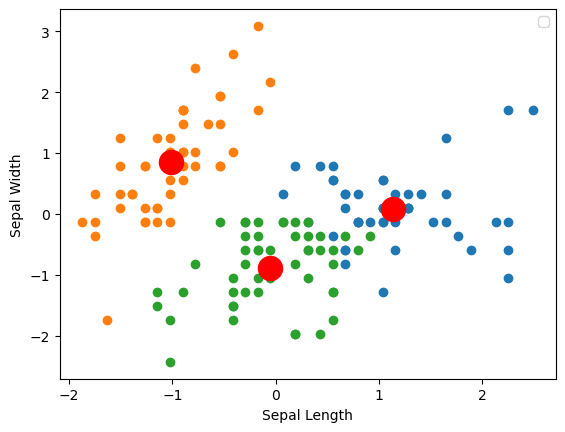

In [19]:
plt.scatter(df_scaled[clusters==0,0],df_scaled[clusters==0,1],label='Cluster 1')
plt.scatter(df_scaled[clusters==1,0],df_scaled[clusters==1,1],label='Cluster 2')
plt.scatter(df_scaled[clusters==2,0],df_scaled[clusters==2,1],label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend('')
plt.show()

In [20]:
# Compare with actual species labels
actual_species = iris.target

# Mapping cluster labels to species labels
cluster_species_mapping = {}
for cluster in np.unique(clusters):
    cluster_species_mapping[cluster] = np.argmax(np.bincount(actual_species[clusters == cluster]))

# Assign predicted species labels based on majority vote in each cluster
predicted_species = [cluster_species_mapping[cluster] for cluster in clusters]

# Check accuracy
accuracy = np.mean(predicted_species == actual_species)
print("Accuracy of K-means clustering:", accuracy)

Accuracy of K-means clustering: 0.8333333333333334


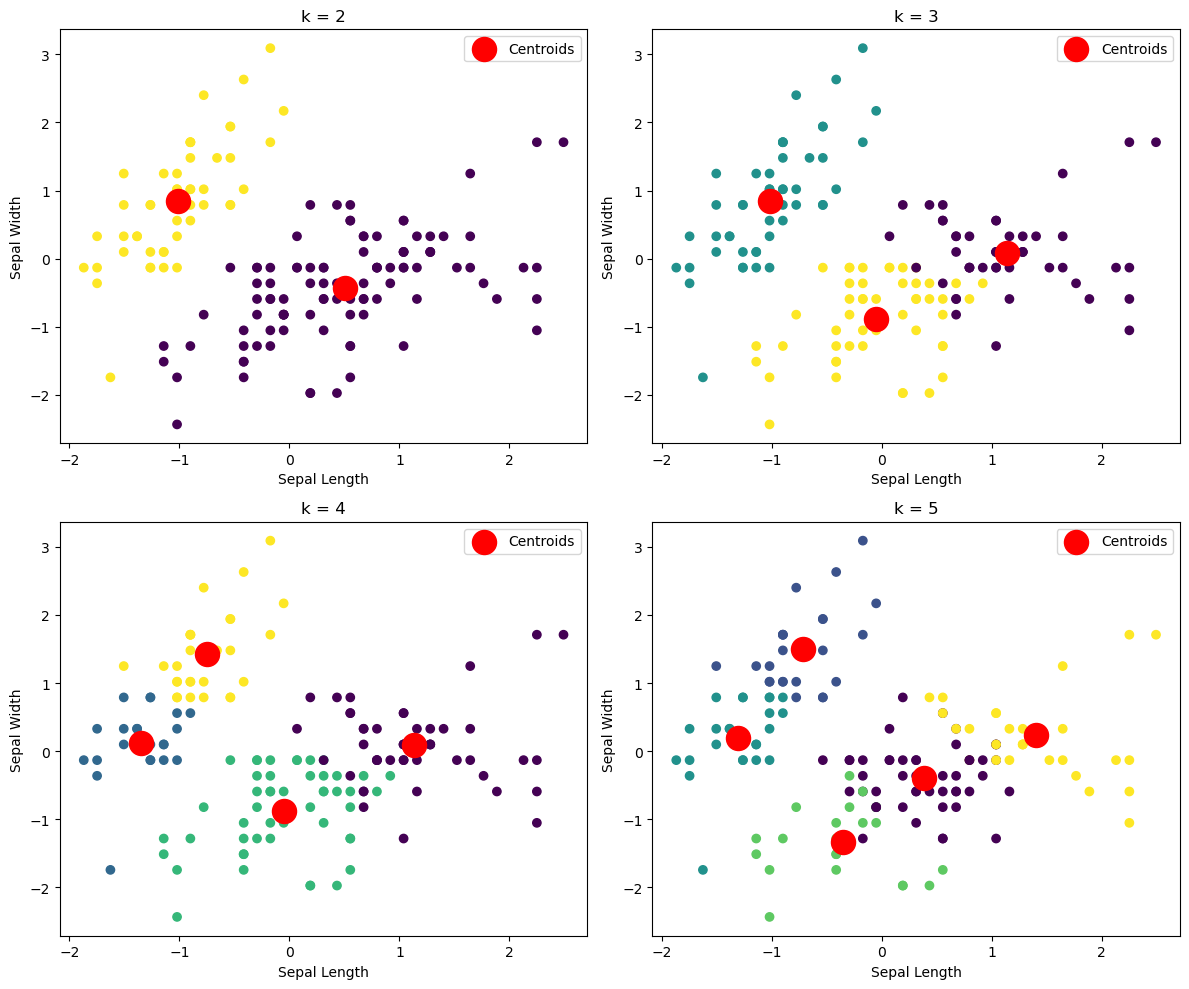

In [26]:
# Define a range of k values
k_values = range(2, 6)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, k in enumerate(k_values):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled)
    
    # Assign cluster labels to the DataFrame
    df["cluster"] = clusters
    
    # Plot the clusters
    ax = axes[i]
    ax.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.legend()

plt.tight_layout()
plt.show()



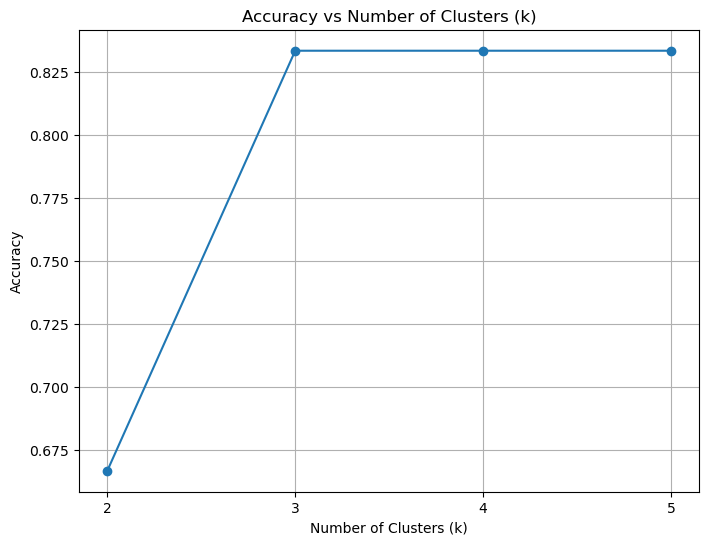

In [23]:
# Calculate accuracy for each k value
accuracies = []

for k in k_values:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled)
    
    # Mapping cluster labels to species labels
    cluster_species_mapping = {}
    for cluster in np.unique(clusters):
        cluster_species_mapping[cluster] = np.argmax(np.bincount(iris.target[clusters == cluster]))
    
    # Assign predicted species labels based on majority vote in each cluster
    predicted_species = [cluster_species_mapping[cluster] for cluster in clusters]
    
    # Calculate accuracy
    accuracy = np.mean(predicted_species == iris.target)
    accuracies.append(accuracy)

# Plot accuracy vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
